With the API for Google Trends, lots of trouble creating a dataset can be bypassed.

References: 
* [https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f](http://)
* [https://pypi.org/project/pytrends/#description](http://)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Installing pytrends**

In [2]:
# !pip uninstall pytrends --yes
!pip install pytrends

**Connecting to Google Trends**

In [3]:
from pytrends.request import TrendReq
pytrend = TrendReq()

**Examples**

In [4]:
# An example getting historical/real-time search interest from Google Trends.
kw_list=['insomnia', 'anxiety', 'depression']
pytrend.get_historical_interest(kw_list, year_start=2020, month_start=5, day_start=1, hour_start=1, year_end=2020, month_end=6, day_end=20, hour_end=23, cat=0, geo='', gprop='', sleep=0) 

The request failed: Google returned a response with code 500.


,insomnia,anxiety,depression,isPartial
date,,,,
2020-05-01 01:00:00,24,93,93,False
2020-05-01 02:00:00,25,100,94,False
2020-05-01 03:00:00,25,98,93,False
2020-05-01 04:00:00,25,94,88,False
2020-05-01 05:00:00,24,81,77,False
...,...,...,...,...
2020-06-20 19:00:00,12,59,58,False
2020-06-20 20:00:00,13,63,59,False
2020-06-20 21:00:00,14,67,59,False


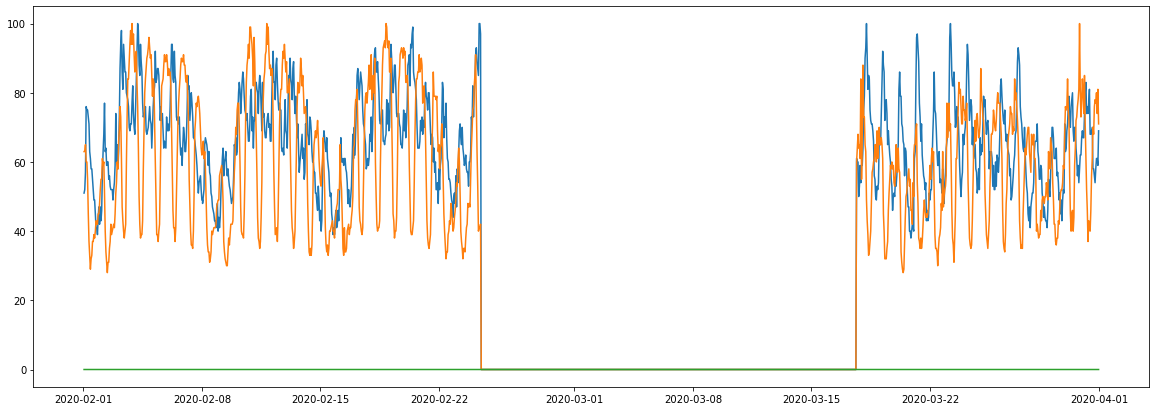

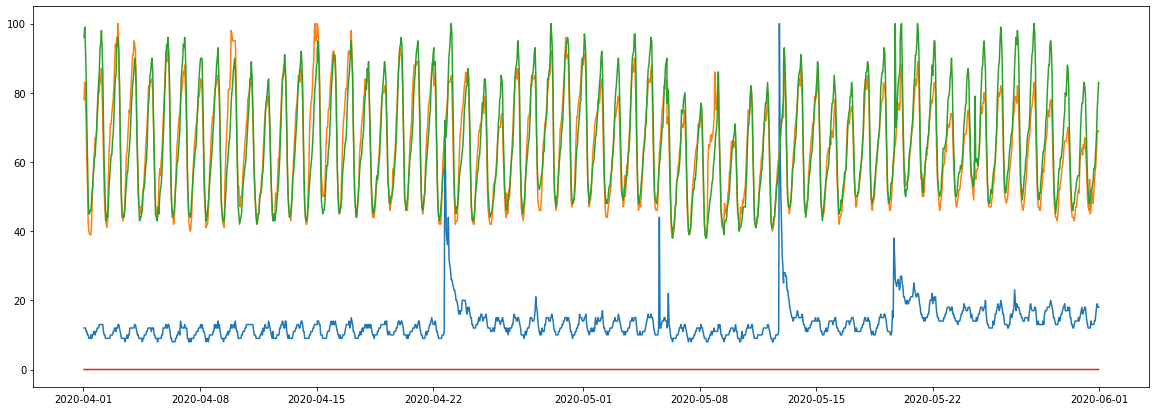

In [5]:
# Line chart plot
kw_list = ['counselling', 'psychiatrist']
interest = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=2, day_start=1, hour_start=1, year_end=2020, month_end=3, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=0) 
plt.figure(figsize=(20, 7))
plt.plot(interest)

plt.figure(figsize=(20, 7))
kw_list = ['ocd', 'depression', 'anxiety']
interest = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=4, day_start=1, hour_start=1, year_end=2020, month_end=5, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=0) 
plt.plot(interest)

In [6]:
# Interest by region
pytrend.build_payload(kw_list=['ocd', 'anxiety', 'depression', 'panic attack', 'mental health'])
df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
df.head(20)

,ocd,anxiety,depression,panic attack,mental health
geoName,,,,,
Afghanistan,5,35,49,0,11
Albania,12,41,36,3,8
Algeria,6,21,67,1,5
American Samoa,0,0,100,0,0
Andorra,0,0,100,0,0
Angola,10,34,44,0,12
Anguilla,0,0,100,0,0
Antarctica,0,0,0,0,0
Antigua & Barbuda,0,42,45,0,13


In [7]:
# Related queires
pytrend.build_payload(kw_list=['ocd', 'anxiety', 'depression', 'panic attack', 'mental health'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                      query  value
0              ocd meaning    100
1              what is ocd    100
2             ocd symptoms     96
3                  anxiety     94
4             ocd disorder     86
5                 ocd test     77
6                 diet ocd     67
7            ocd treatment     64
8                     diet     64
9                   my ocd     56
10            ocd thoughts     53
11          ocd definition     45
12         ocd and anxiety     35
13                ocd help     33
14              depression     32
15          ocd medication     32
16          ocd depression     32
17                    adhd     31
18             ocd therapy     26
19         symptoms of ocd     24
20              google ocd     23
21            ocd children     21
22                ocd mean     21
23  intrusive thoughts ocd     20
24              ocd causes     20, 'rising':                        query  value
0                  ocd מסעדה  11350
1      ocd t

In [8]:
pytrend.build_payload(kw_list=['mental health coronavirus'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                                 query  value
0       coronavirus and mental health    100
1    mental health during coronavirus     69
2                      coronavirus uk     37
3   coronavirus mental health support     19
4                    coronavirus tips     18
5       who coronavirus mental health     15
6                coronavirus symptoms     13
7                  coronavirus update     12
8       thank you coronavirus helpers     10
9                     nhs coronavirus      9
10                           bbc news      7
11            mental health awareness      6, 'rising':                                 query   value
0    mental health during coronavirus  613600
1                      coronavirus uk  331650
2   coronavirus mental health support  165900
3                    coronavirus tips  155700
4       who coronavirus mental health  135350
5                coronavirus symptoms  111300
6                  coronavirus update  107600
7       thank y

In [9]:
pytrend.build_payload(kw_list=['anxiety coronavirus'])
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0         anxiety and coronavirus    100
1            coronavirus symptoms     88
2                anxiety symptoms     85
3        anxiety with coronavirus     61
4         symptoms of coronavirus     42
5             symptoms of anxiety     40
6      anxiety during coronavirus     32
7        anxiety from coronavirus     31
8                  anxiety attack     27
9       anxiety about coronavirus     26
10                 coronavirus uk     24
11         coronavirus anxiety uk     23
12               coronavirus tips     20
13         coronavirus or anxiety     19
14               coronavirus news     19
15       coronavirus anxiety tips     19
16  thank you coronavirus helpers     18
17             chest pain anxiety     17
18         chest pain coronavirus     17
19     health anxiety coronavirus     17
20                 health anxiety     17
21       anxiety over coronavirus     17
22               anxiety disorder   

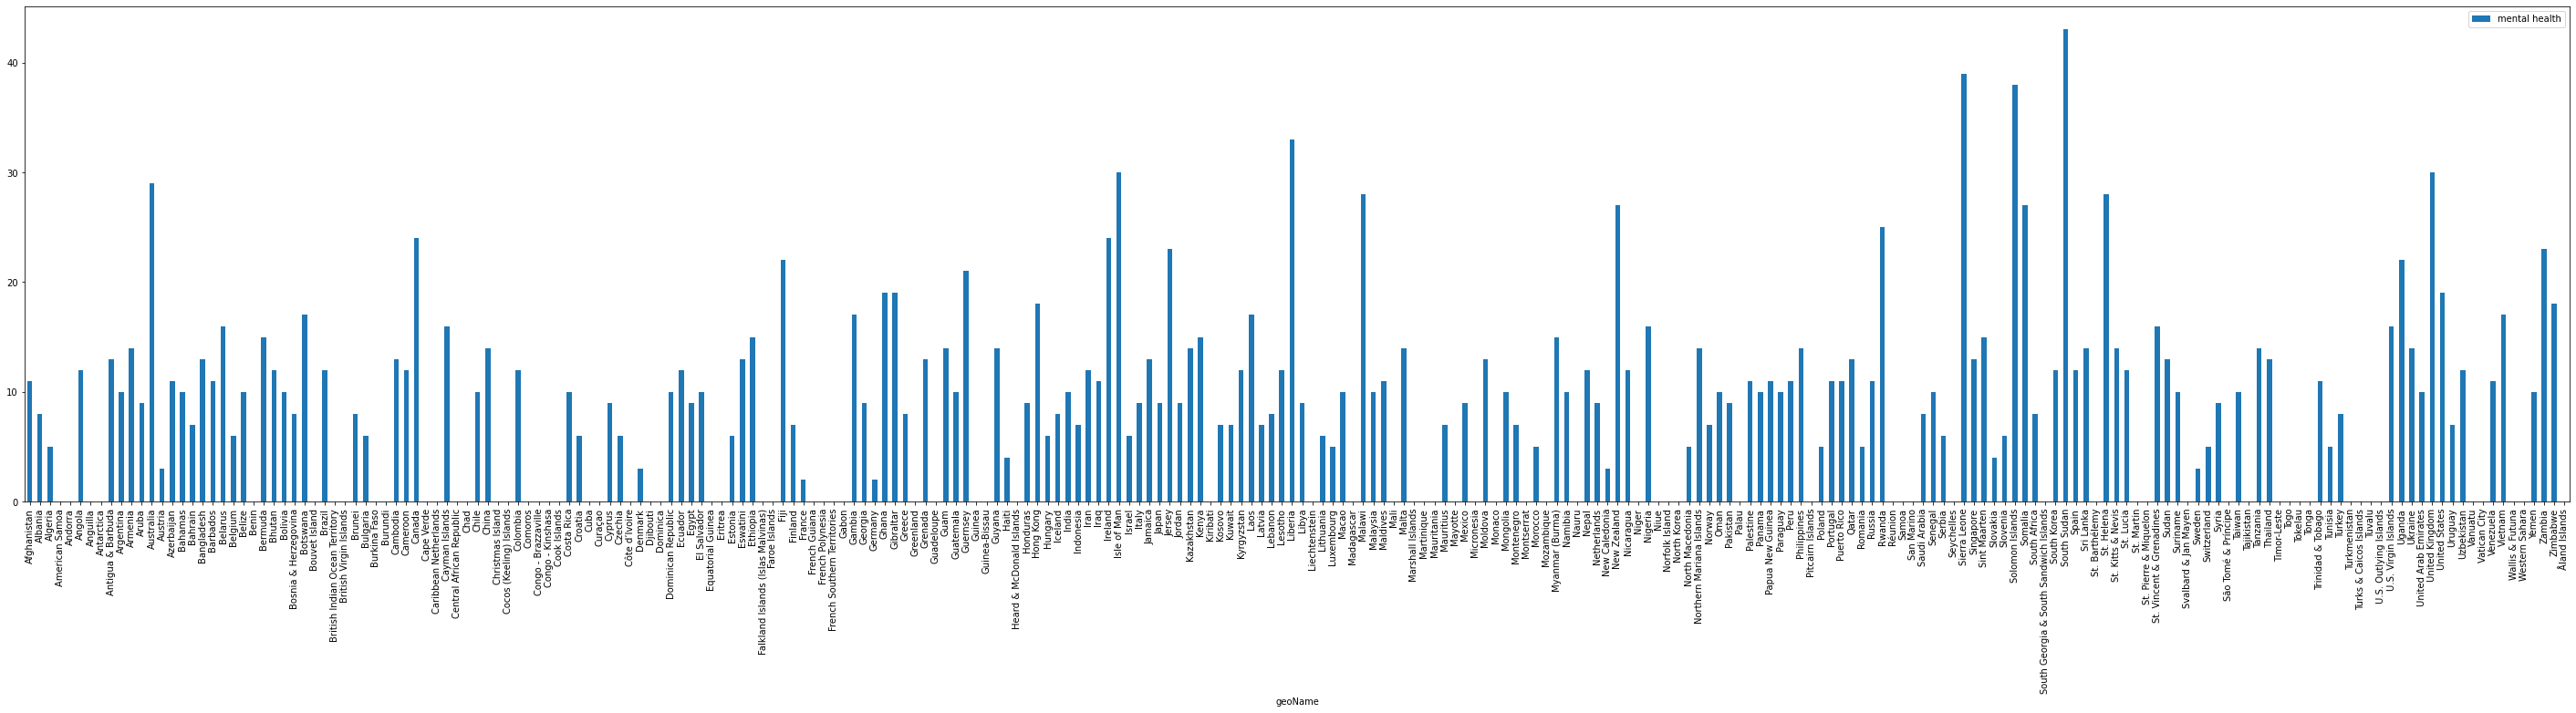

In [10]:
df.reset_index().plot(x='geoName', y='mental health', figsize=(50, 10), kind='bar')